In [1]:
import pygmt
import numpy as np
import pandas as pd

In [2]:
path = '/Users/sydneydybing/StrainProject/2024/'

# NA data
na_psmeca_path = path + 'psmeca_mag3rdcol.txt' # Focal mechanisms
bsm_mda = pd.read_csv(path + 'bsm_metadata.csv') # Stations
na_stas = bsm_mda.loc[(bsm_mda['LONG'] <= -110) & (bsm_mda['LONG'] >= -130)]

# Japan
jp_psmeca_path = path + 'tohoku_psmeca_formattedwmag.txt' # Focal mechanisms
jp_stas = pd.read_csv(path + 'tohoku_strain_data/stations.list', delimiter = '\s+') # Stations

# Taiwan
tw_psmeca_path = path + 'taiwan3eq_psmeca_formattedwmag.txt' # Focal mechanisms
tw_stas = pd.read_csv(path + 'taiwan_strain_data/station_data.csv') # Stations

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_82209/4088421707.py:10: SyntaxWarning: invalid escape sequence '\s'
  jp_stas = pd.read_csv(path + 'tohoku_strain_data/stations.list', delimiter = '\s+') # Stations


In [7]:
# Make custom CPT

pygmt.makecpt(cmap = 'viridis', series = [6,7.2], reverse = True, output = path + 'full_mag_range_cpt.cpt')

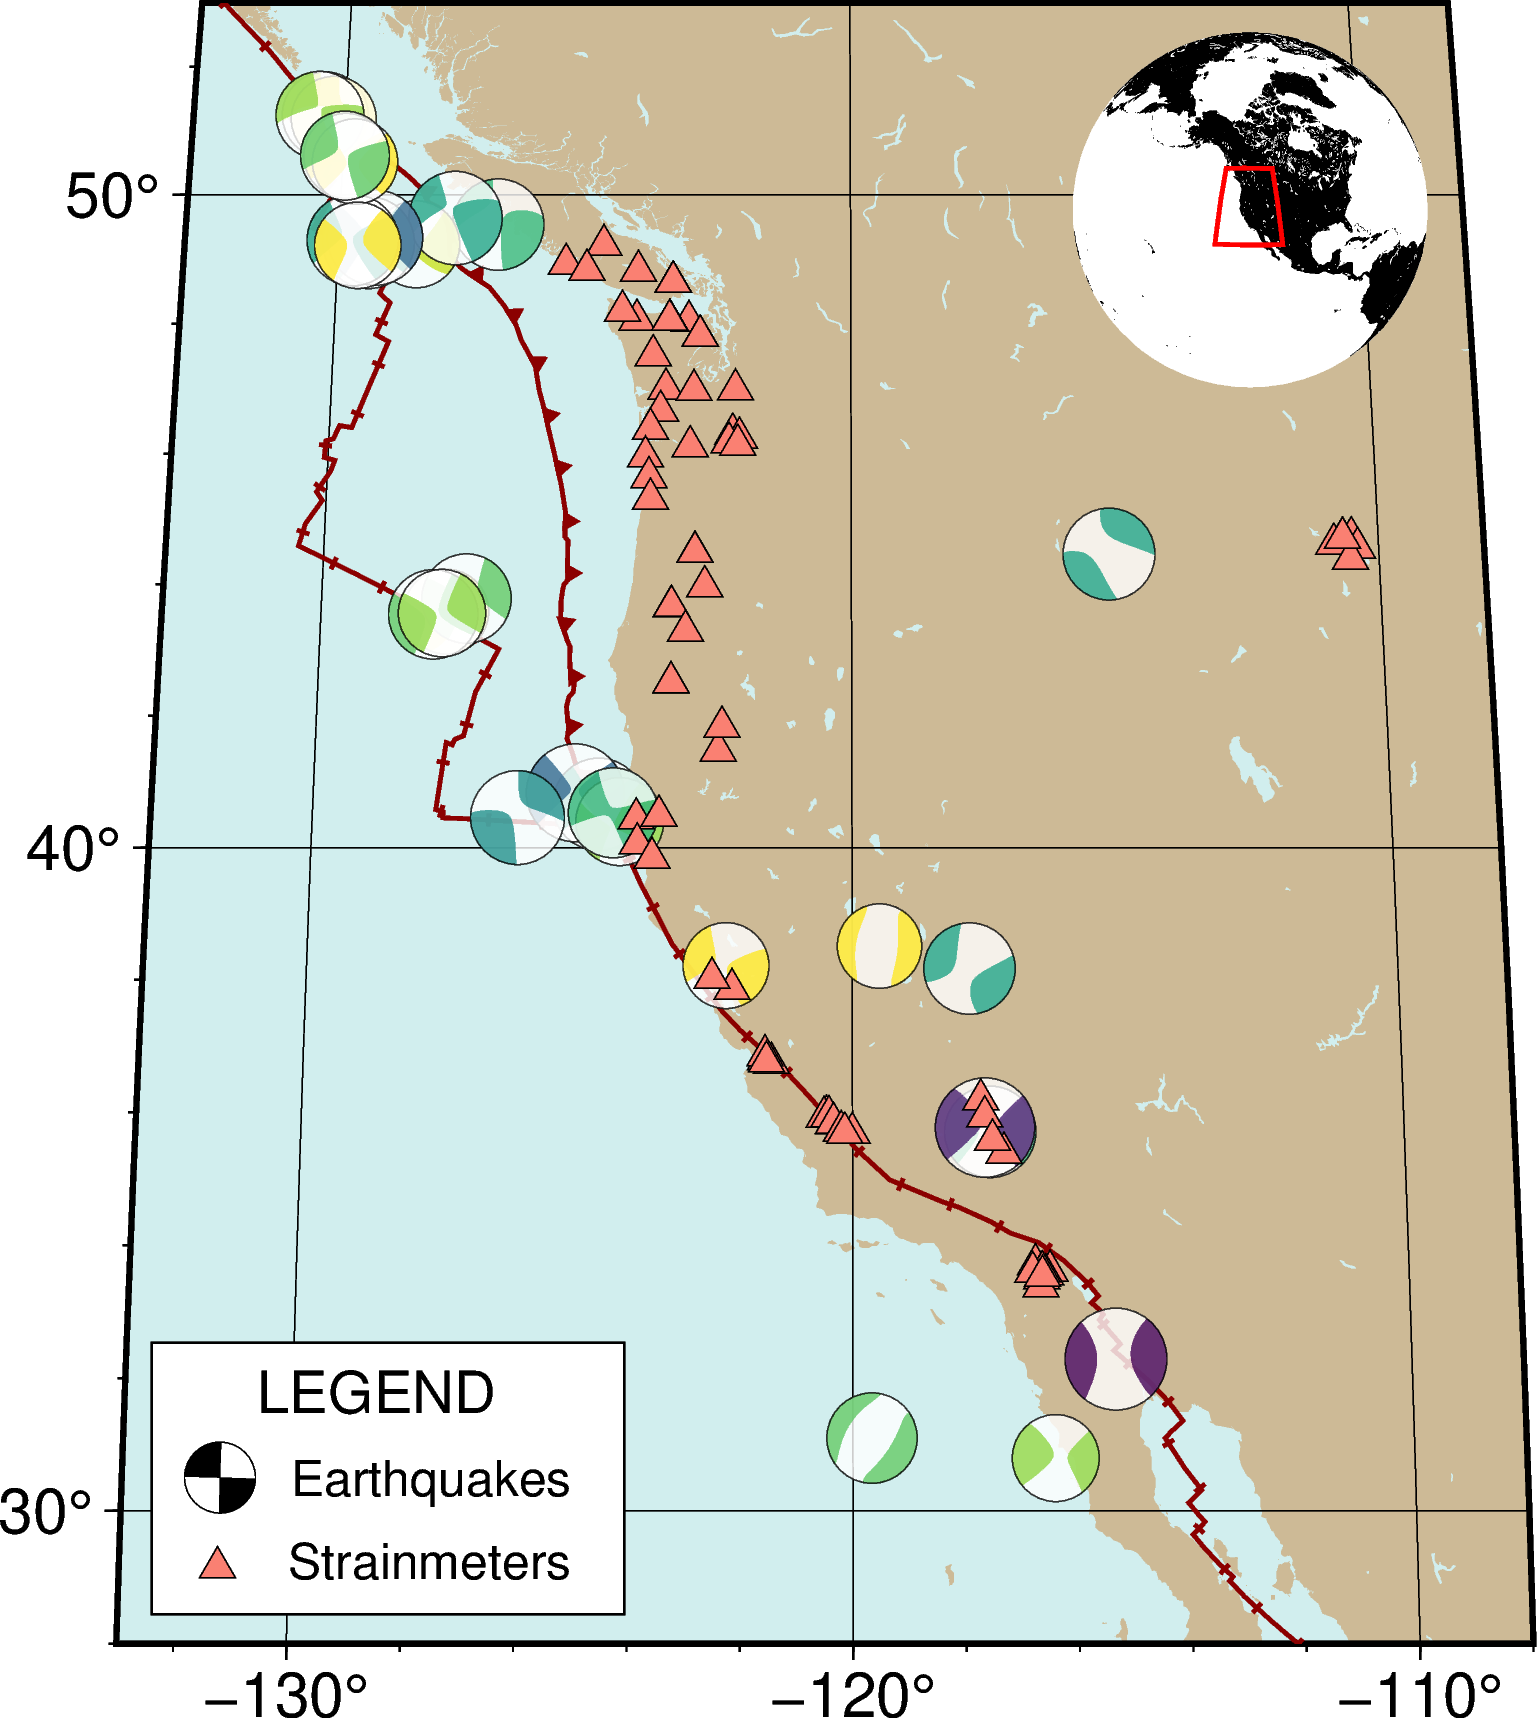

In [43]:
# Plot

pygmt.config(COLOR_BACKGROUND = 'white')

fig = pygmt.Figure()

# North America

region = [-133,-108,28,53]
fig.coast(region = region, projection = 'N12c', land = 'wheat3', water = 'lightcyan2', frame = 'afg') # Coastline
fig.plot(data = path + 'PB2002_boundaries.gmt', pen = '1p,darkred', style = 'f0.25/3p', fill = 'darkred') # Plate boundaries

# Plot focal mechanisms

fig.meca(spec = na_psmeca_path, convention = 'mt', scale = '0.6c', cmap = path + 'full_mag_range_cpt.cpt', transparency = 20)
# with pygmt.config(FONT = '18'):
#     fig.colorbar(frame = 'af+lEarthquake magnitude', cmap = path + 'full_mag_range_cpt.cpt')

# Plot stations 

fig.plot(x = na_stas.LONG, y = na_stas.LAT, style = 't0.35c', fill = 'salmon', pen = 'black') # Symbols
# fig.text(x = na_stas.LONG+1, y = na_stas.LAT, text = na_stas.BNUM, font = '6p,black') # Labels

# Add inset map

with fig.inset(position = 'jTR+w3c+o0.9c/0.25c'):
    fig.coast(projection = 'G-120/40/3c', land = 'black', water = 'white')
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data = rectangle, style = 'r+s', pen = '1p,red')
    
# Make legend

with fig.inset(position = 'jBL+w4c/2.3c+o0.3c/0.25c', box = '+p0.5+gwhite'):
    pass
legend_meca = {'strike': 90, 'dip': 90, 'rake': 0, 'magnitude': 5}
fig.meca(spec = legend_meca, scale = '0.6c', longitude = -131.25, latitude = 30.5, depth = 0, compressionfill = 'black') # compressionfill = '#22a785'
fig.text(text = ['Earthquakes'], x = -127.5, y = 30.5, font = '12p,black')
fig.plot(x = -131.25, y = 29.15, fill = 'salmon', pen = 'black', style = 't0.35c')
fig.text(text = ['Strainmeters'], x = -127.5, y = 29.25, font = '12p,black')
fig.text(text = ['LEGEND'], x = -128.5, y = 31.8, font = '14p,black')

# Show or save 

fig.show();

fig.savefig(path + 'figures/NA_earthquake_station_map_fmscoloredbymag.pdf');

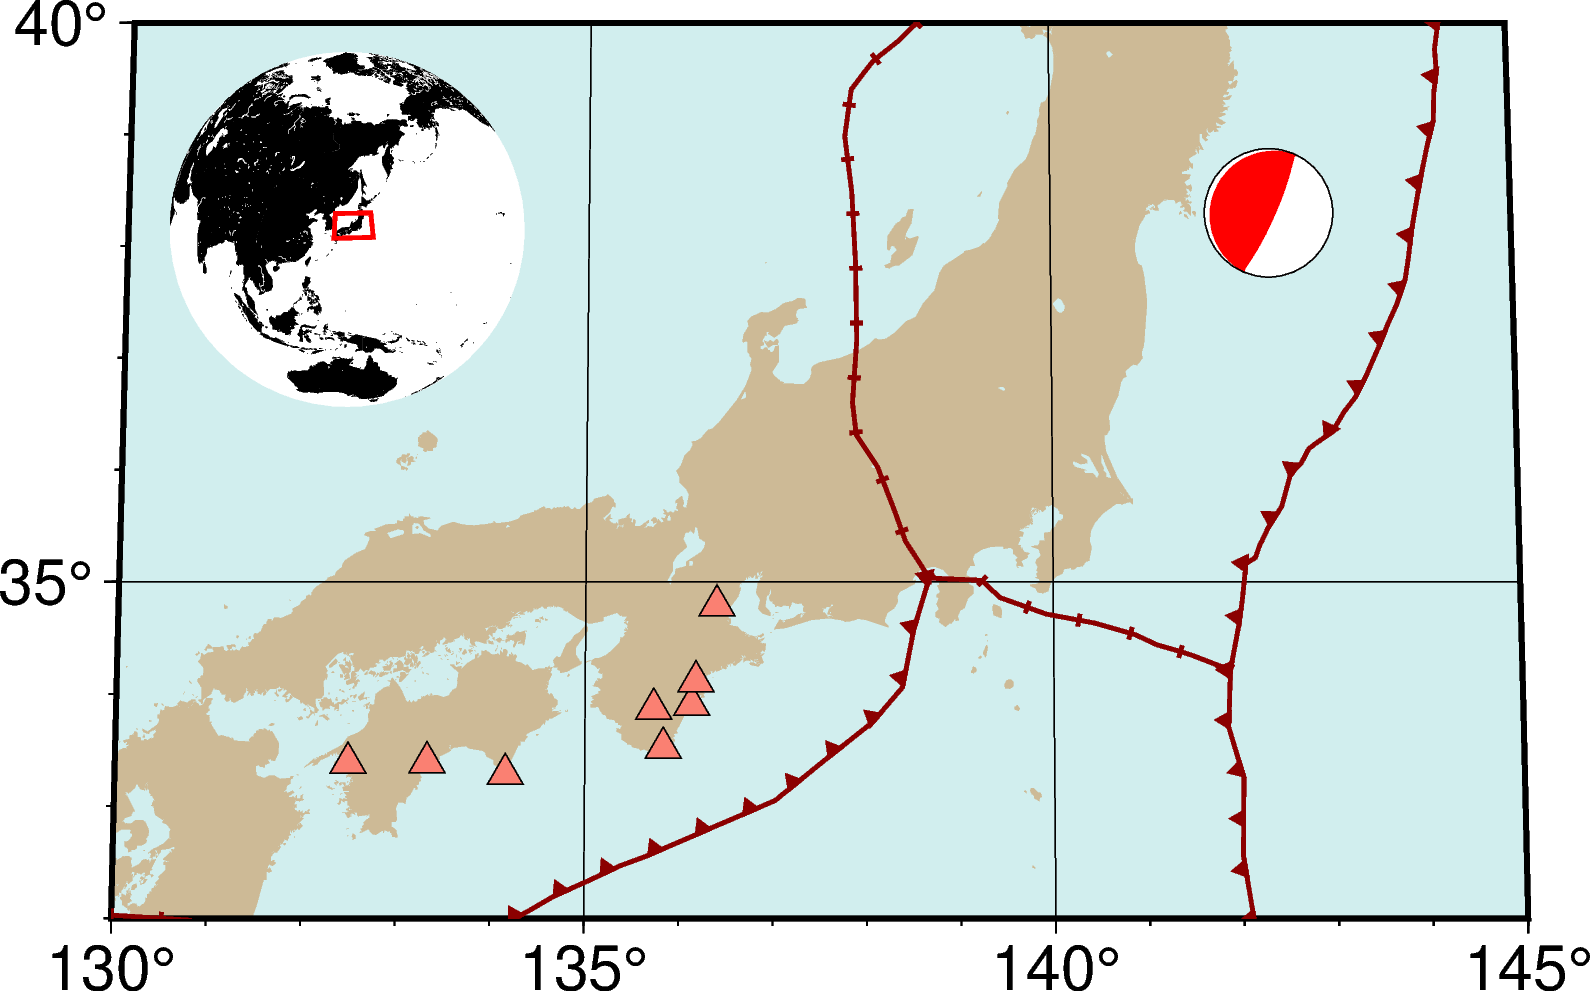

In [16]:
pygmt.config(COLOR_BACKGROUND = 'white')

fig = pygmt.Figure()

region = [130,145,32,40]
fig.coast(region = region, projection = 'N12c', land = 'wheat3', water = 'lightcyan2', frame = 'afg') # Coastline
fig.plot(data = path + 'PB2002_boundaries.gmt', pen = '1p,darkred', style = 'f0.25/3p', fill = 'darkred') # Plate boundaries
    
# Focal mechanisms

fig.meca(spec = jp_psmeca_path, convention = 'mt', scale = '0.6c', compressionfill = 'red')

# Plot stations 

fig.plot(x = jp_stas.longitude, y = jp_stas.latitude, style = 't0.35c', fill = 'salmon', pen = 'black') # Symbols
# fig.text(x = jp_stas.longitude+1, y = jp_stas.latitude, text = jp_stas.Station_name, font = '6p,black') # Labels

# # Make legend

# with fig.inset(position = 'jBR+w4c/2.3c+o0.3c/0.25c', box = '+p0.5+gwhite'):
#     pass
# # fig.plot(x = -131.25, y = 30.5, fill = '#22a785', pen = 'black', style = 'c0.6c')
# legend_meca = {'strike': 193, 'dip': 9, 'rake': 78, 'magnitude': 5}
# fig.meca(spec = legend_meca, scale = '0.6c', longitude = 140.3, latitude = 33.5, depth = 0, compressionfill = '#440154FF')
# fig.text(text = ['Tohoku M9.1'], x = 142.5, y = 33.5, font = '12p,black')
# fig.plot(x = 140.3, y = 32.7, fill = 'salmon', pen = 'black', style = 't0.35c')
# fig.text(text = ['Strainmeters'], x = 142.5, y = 32.75, font = '12p,black')
# fig.text(text = ['LEGEND'], x = 142.2, y = 34.3, font = '14p,black')

# Add inset map - non-global

# with fig.inset(position = 'jTR+o8.5c/0.2c', region = [127, 149, 29, 46], projection = 'N3c'): # jTR means top right point on the map is the anchor, w = width (can add /height), o is dx/dy offset from anchor
#     fig.coast(projection = 'N3c', land = 'black', water = 'white')
#     rectangle = [[region[0], region[2], region[1], region[3]]]
#     fig.plot(data = rectangle, style = 'r+s', pen = '1p,red')
    
with fig.inset(position = 'jTL+w3c+o0.5c/0.25c'):
    fig.coast(projection = 'G135/35/3c', land = 'black', water = 'white')
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data = rectangle, style = 'r+s', pen = '1p,red')

# Show or save 

fig.show();

fig.savefig(path + 'figures/Japan_earthquake_station_map.pdf');

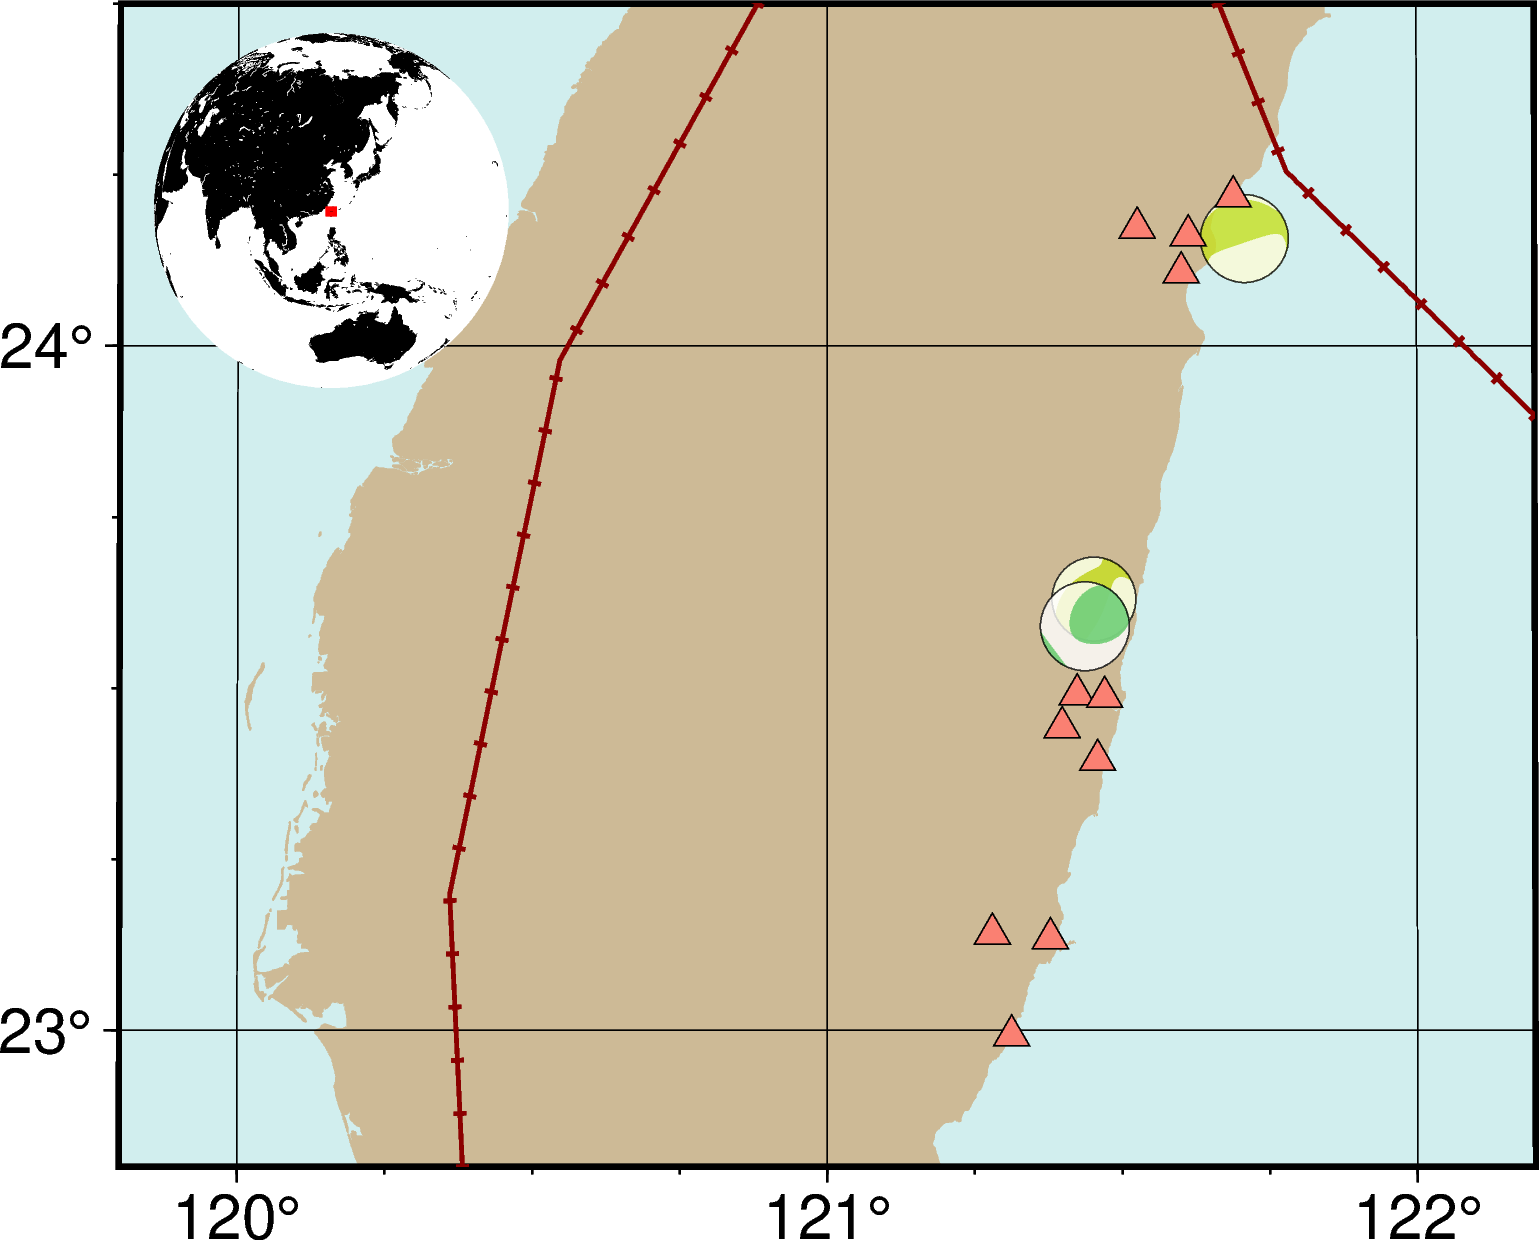

In [17]:
pygmt.config(COLOR_BACKGROUND = 'white')

fig = pygmt.Figure()

region = [119.8,122.2,22.8,24.5]
fig.coast(region = region, projection = 'N12c', land = 'wheat3', water = 'lightcyan2', frame = 'afg') # Coastline
fig.plot(data = path + 'PB2002_boundaries.gmt', pen = '1p,darkred', style = 'f0.25/3p', fill = 'darkred') # Plate boundaries
    
# Focal mechanisms
fig.meca(spec = tw_psmeca_path, convention = 'mt', scale = '0.6c', cmap = path + 'full_mag_range_cpt.cpt', transparency = 20)

# Plot stations 

fig.plot(x = tw_stas.Lon, y = tw_stas.Lat, style = 't0.35c', fill = 'salmon', pen = 'black') # Symbols
# fig.text(x = na_stas.LONG+1, y = na_stas.LAT, text = na_stas.BNUM, font = '6p,black') # Labels

# # Make legend

# with fig.inset(position = 'jBL+w4c/2.3c+o0.3c/0.25c', box = '+p0.5+gwhite'):
#     pass
# # fig.plot(x = -131.25, y = 30.5, fill = '#22a785', pen = 'black', style = 'c0.6c')
# legend_meca = {'strike': 90, 'dip': 90, 'rake': 0, 'magnitude': 5}
# fig.meca(spec = legend_meca, scale = '0.6c', longitude = 120, latitude = 23, depth = 0, compressionfill = '#22a785')
# fig.text(text = ['Earthquakes'], x = 120, y = 23, font = '12p,black')
# fig.text(text = ['Tohoku M9.1'], x = 142.5, y = 33.5, font = '12p,black')
# fig.plot(x = 140.3, y = 32.7, fill = 'salmon', pen = 'black', style = 't0.35c')
# fig.text(text = ['Strainmeters'], x = 142.5, y = 32.75, font = '12p,black')
# fig.text(text = ['LEGEND'], x = 120, y = 23.2, font = '14p,black')

# Add inset map

# with fig.inset(position = 'jTL+o0.3c/0.3c', region = [118, 124, 21, 26], projection = 'N3c'): # jTR means top right point on the map is the anchor, w = width (can add /height), o is dx/dy offset from anchor
#     fig.coast(projection = 'N3c', land = 'black', water = 'white')
#     rectangle = [[region[0], region[2], region[1], region[3]]]
#     fig.plot(data = rectangle, style = 'r+s', pen = '1p,red')
    
with fig.inset(position = 'jTL+w3c+o0.3c/0.25c'):
    fig.coast(projection = 'G121/24/3c', land = 'black', water = 'white')
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data = rectangle, style = 'r+s', pen = '1p,red')

# Show or save 

fig.show();

fig.savefig(path + 'figures/Taiwan_earthquakes_station_map.pdf');